# hw7

> I pledge my Honor that I have abided by the Stevens Honor System. - Joshua Schmidt 4/10/21

imports

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from typing import Tuple

In [4]:
df = pd.read_csv('./data.csv')
print(df.columns)

Index(['Date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom', 'Food', 'Beer', 'Smoke',
       'Games', 'Books', 'Hshld', 'Clths', 'Hlth', 'Chems', 'Txtls', 'Cnstr',
       'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry', 'Mines', 'Coal', 'Oil',
       'Util', 'Telcm', 'Servs', 'BusEq', 'Paper', 'Trans', 'Whlsl', 'Rtail',
       'Meals', 'Fin', 'Other'],
      dtype='object')


In [7]:
used_data = df[['Mkt-RF', 'SMB', 'HML', 'Mom']]
print(used_data.shape)
used_data.head()

(948, 4)


,Mkt-RF,SMB,HML,Mom
0,-0.10,-0.09,4.72,0.36
1,4.32,0.31,3.40,-1.67
2,0.33,-1.77,-2.42,2.97
3,0.42,0.30,1.03,4.53
4,5.36,0.67,3.41,3.41


In [129]:
def pca(data: pd.DataFrame) -> None:
    """
    compute pca of given dataframe
    """
    pca = PCA(n_components = 2)
    pca.fit(data)
    print(f'explained variance: {pca.explained_variance_ratio_}')
    covariance = pca.get_covariance()
    num_components = 4
    sum_components = sum(sorted(np.diag(covariance), reverse=True)[:num_components])
    print(f'sum of {num_components} principle components in covariance matrix: {sum_components:.2f}%')

    print(f'components:\n{pca.components_}')

    def draw_vector(v0, v1, ax=None):
        ax = ax or plt.gca()
        arrowprops=dict(arrowstyle='->',
                        linewidth=2,
                        color='black',
                        shrinkA=0, shrinkB=0)
        ax.annotate('', v1, v0, arrowprops=arrowprops)

    # plot data
    sns.scatterplot(data=data, x='Mkt-RF', y='SMB')
    num_pca = 2
    for length, vector in zip(pca.explained_variance_, [pca.components_[0, :2], pca.components_[1, 2:]]):
        v = vector * 3 * np.sqrt(length)
        means = [pca.mean_[0], pca.mean_[1]]
        draw_vector(means, means + v)
    plt.axis('equal')
    plt.show()

explained variance: [0.514017   0.23808719]
sum of 4 principle components in covariance matrix: 76.51%
components:
[[ 0.77050128  0.22686753  0.2721436  -0.52990259]
 [-0.56991811 -0.17166117  0.40301164 -0.69520314]]


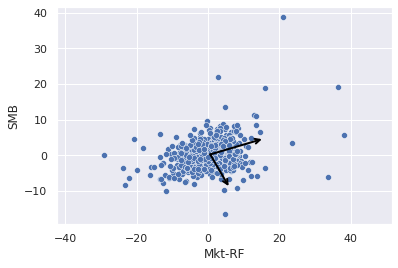

In [130]:
pca(used_data)

4 principle components account for 75% of the covariance matrix (it's actually 76.51%).